# Importing Essential Libraries

In [358]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [359]:
# Import datasets
data = pd.read_csv('imdb_top_2000_movies.csv')
data.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [360]:
# Remove all commas convert object to float for Votes
data['Votes'] = data['Votes'].str.replace(',', '')
data['Votes'] = data['Votes'].astype(float)

# Remove $ sign and M symbol and convert to float for Gross
data['Gross'] = data['Gross'].str.replace('$', '')
data['Gross'] = data['Gross'].str.replace('M', '')
data['Gross'] = data['Gross'].astype(float)
data['Gross'] = data['Gross'] * (10 ** 6)
# Convert Release Year from object to flaot
data['Release Year'] = pd.to_numeric(data['Release Year'], errors='coerce')
df = pd.DataFrame(data)

In [361]:
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972.0,175,9.2,100.0,2002655.0,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134970000.0
1,The Godfather Part II,1974.0,202,9.0,90.0,1358608.0,"Crime, Drama",Francis Ford Coppola,Al Pacino,57300000.0
2,Ordinary People,1980.0,124,7.7,86.0,56476.0,Drama,Robert Redford,Donald Sutherland,54800000.0
3,Lawrence of Arabia,1962.0,218,8.3,100.0,313044.0,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44820000.0
4,Straw Dogs,1971.0,113,7.4,73.0,64331.0,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009.0,105,7.2,64.0,66235.0,"Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,11000000.0
1996,Tooth Fairy,NaN,101,5.0,36.0,49527.0,"Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,60020000.0
1997,The Informant!,2009.0,108,6.5,66.0,67318.0,"Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,33310000.0
1998,Youth in Revolt,2009.0,90,6.4,63.0,75956.0,"Comedy, Drama, Romance",Miguel Arteta,Michael Cera,15280000.0


In [362]:
df.describe()

,Release Year,Duration,IMDB Rating,Metascore,Votes,Gross
count,1921.000000,2000.000000,2000.000000,1919.000000,2.000000e+03,1.903000e+03
mean,1995.871421,113.939000,6.922600,61.044294,2.238953e+05,6.618636e+07
std,14.568860,22.946035,0.955618,17.937722,2.766967e+05,7.282108e+07
min,1921.000000,50.000000,1.500000,9.000000,1.883000e+03,0.000000e+00
25%,1991.000000,98.000000,6.400000,48.000000,7.909800e+04,1.822000e+07
50%,2001.000000,110.000000,7.000000,61.000000,1.353120e+05,4.482000e+07
75%,2006.000000,125.000000,7.600000,74.000000,2.521338e+05,8.707000e+07
max,2010.000000,271.000000,9.300000,100.000000,2.875249e+06,7.605100e+08


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  1921 non-null   float64
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   float64
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 156.4+ KB


In [364]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)
print(df.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2000, 10)
Movie Name       object
Release Year    float64
Duration          int64
IMDB Rating     float64
Metascore       float64
Votes           float64
Genre            object
Director         object
Cast             object
Gross           float64
dtype: object


In [365]:
# Drop columns
df = df.drop(['Cast'], axis=1)
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Gross
0,The Godfather,1972.0,175,9.2,100.0,2002655.0,"Crime, Drama",Francis Ford Coppola,134970000.0
1,The Godfather Part II,1974.0,202,9.0,90.0,1358608.0,"Crime, Drama",Francis Ford Coppola,57300000.0
2,Ordinary People,1980.0,124,7.7,86.0,56476.0,Drama,Robert Redford,54800000.0
3,Lawrence of Arabia,1962.0,218,8.3,100.0,313044.0,"Adventure, Biography, Drama",David Lean,44820000.0
4,Straw Dogs,1971.0,113,7.4,73.0,64331.0,"Crime, Drama, Thriller",Sam Peckinpah,NaN
...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009.0,105,7.2,64.0,66235.0,"Biography, Drama, History",Jean-Marc Vallée,11000000.0
1996,Tooth Fairy,NaN,101,5.0,36.0,49527.0,"Comedy, Family, Fantasy",Michael Lembeck,60020000.0
1997,The Informant!,2009.0,108,6.5,66.0,67318.0,"Biography, Comedy, Crime",Steven Soderbergh,33310000.0
1998,Youth in Revolt,2009.0,90,6.4,63.0,75956.0,"Comedy, Drama, Romance",Miguel Arteta,15280000.0


<Axes: >

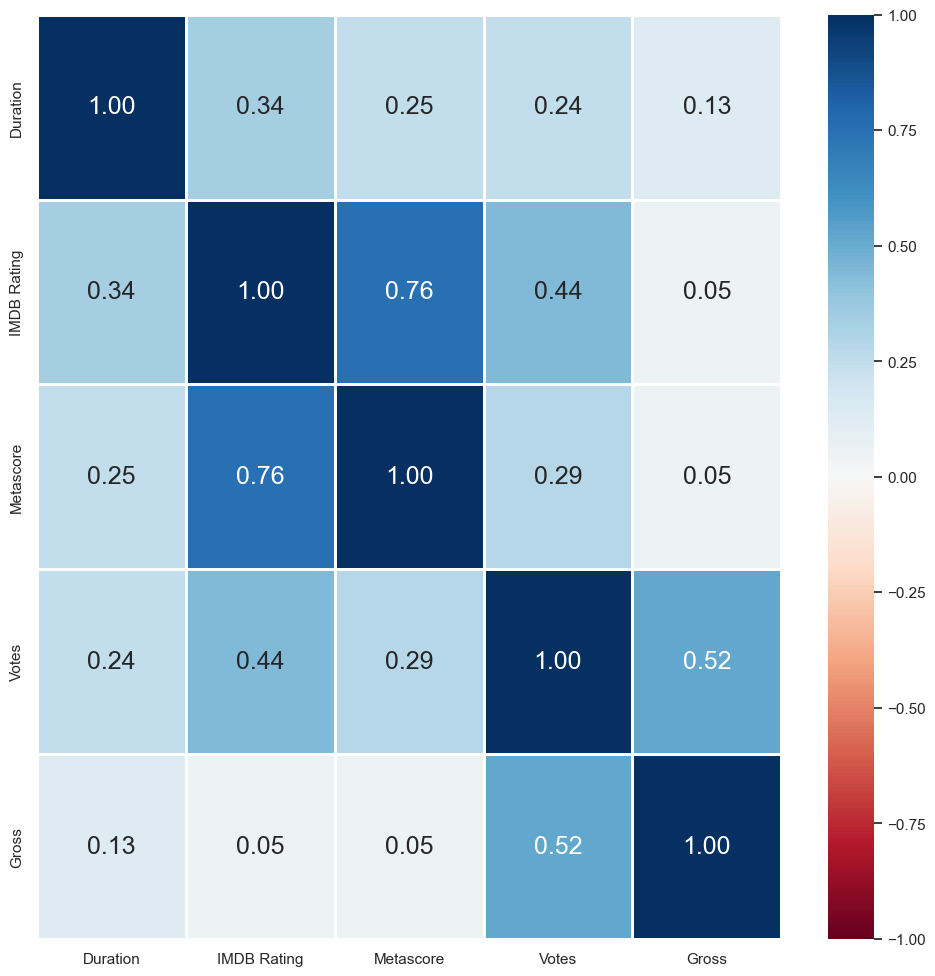

In [366]:
corrDF=pd.DataFrame(df[['Duration', 'IMDB Rating', 'Metascore', 'Votes', 'Gross']])
f = plt.figure(figsize=(12, 12))
sb.heatmap(corrDF.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

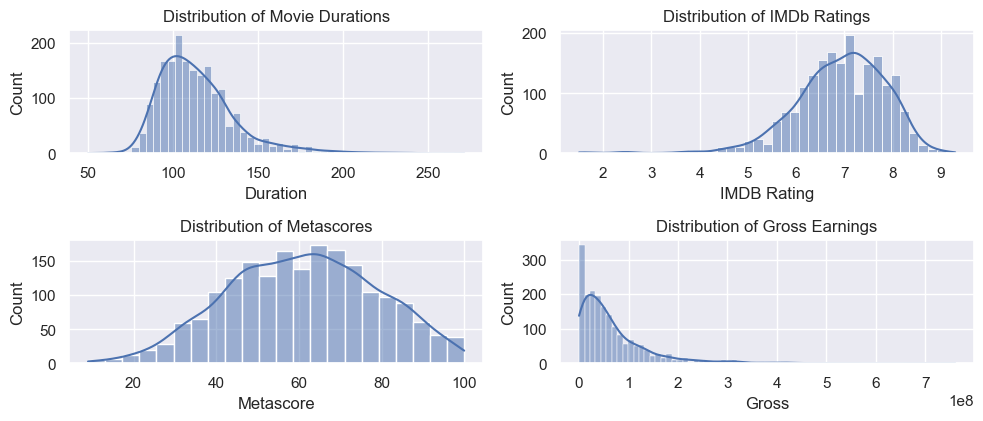

In [367]:
# Histograms/Distribution Plots
plt.figure(figsize=(10, 6))
plt.subplot(3, 2, 1)
sb.histplot(df['Duration'], kde=True)
plt.title('Distribution of Movie Durations')

plt.subplot(3, 2, 2)
sb.histplot(df['IMDB Rating'], kde=True)
plt.title('Distribution of IMDb Ratings')

plt.subplot(3, 2, 3)
sb.histplot(df['Metascore'].dropna(), kde=True)
plt.title('Distribution of Metascores')

plt.subplot(3, 2, 4)
sb.histplot(df['Gross'].dropna(), kde=True)
plt.title('Distribution of Gross Earnings')
plt.tight_layout()
plt.show()


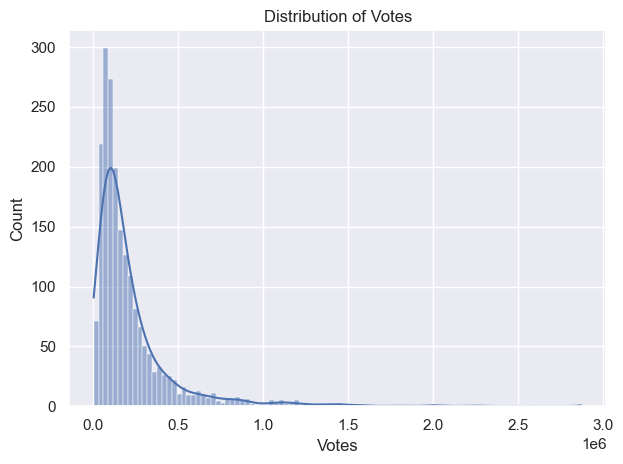

In [368]:
sb.histplot(df['Votes'].dropna(),bins=100, kde=True)
#plt.xscale('log')
plt.title('Distribution of Votes')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Release Years')

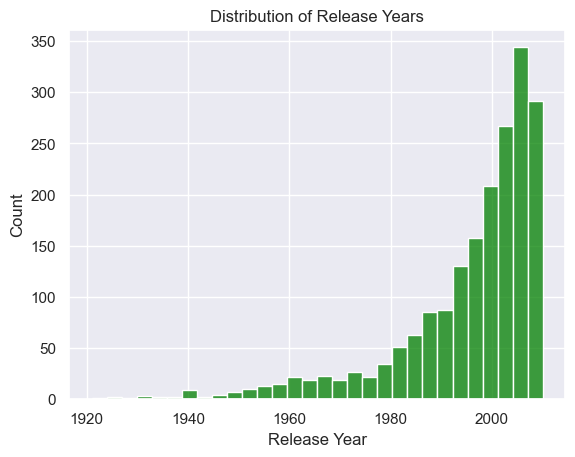

In [369]:
# Dropping NaN values in 'Release Year Numeric' for plotting
sb.histplot(df['Release Year'], bins=30, color='green')
plt.title('Distribution of Release Years')

Text(0.5, 1.0, 'Top 15 Genres')

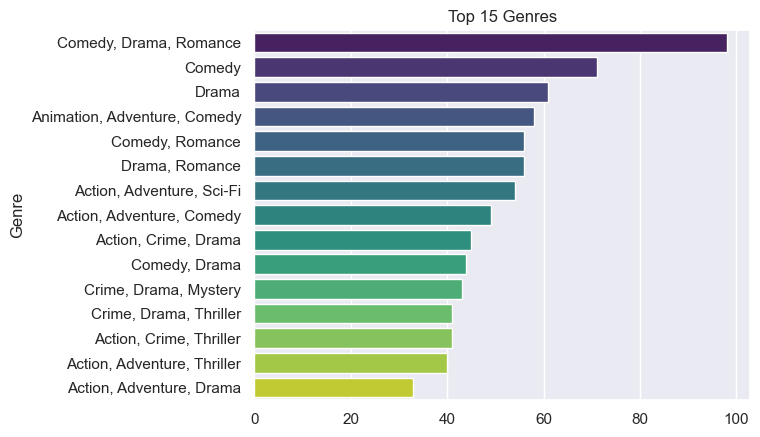

In [370]:
top_genres = df['Genre'].value_counts().head(15)
sb.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 15 Genres')

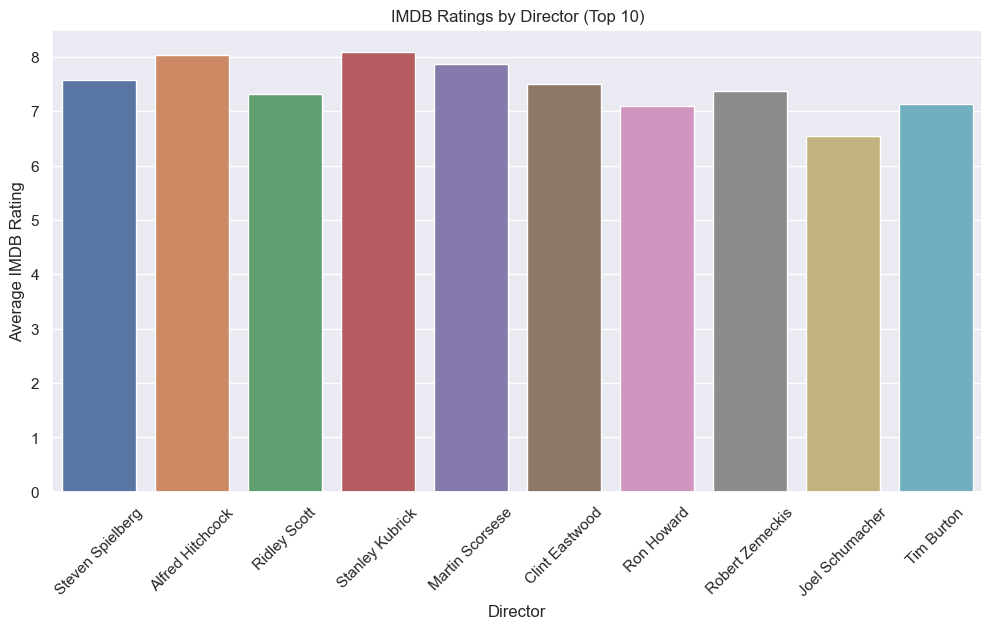

In [372]:
# Bar Plot for IMDb Ratings by Director
plt.figure(figsize=(12, 6))
top_directors = df['Director'].value_counts().head(10).index
sb.barplot(x='Director', y='IMDB Rating', data=df[df['Director'].isin(top_directors)], errorbar=None)
plt.title('IMDB Ratings by Director (Top 10)')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Box Plot of IMDb Ratings')

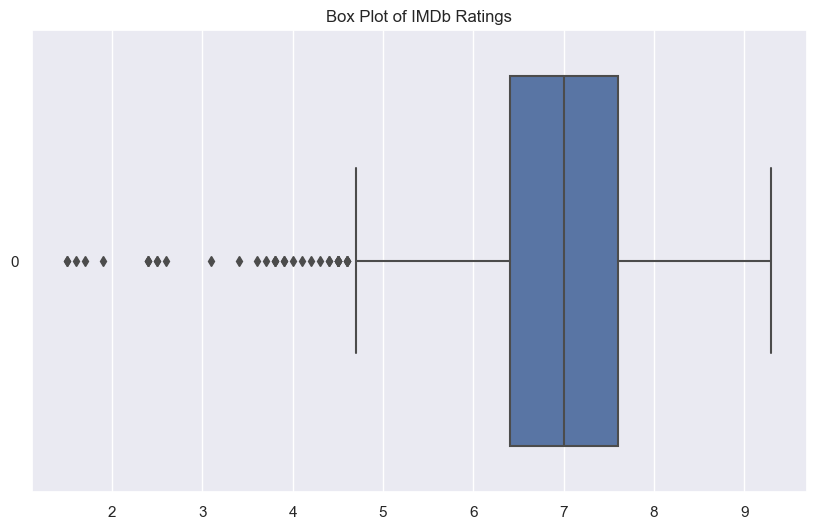

In [442]:
# Box Plot for IMDb Ratings and Metascores
plt.figure(figsize=(10, 6))
sb.boxplot(df['IMDB Rating'],orient='h')
plt.title('Box Plot of IMDb Ratings')




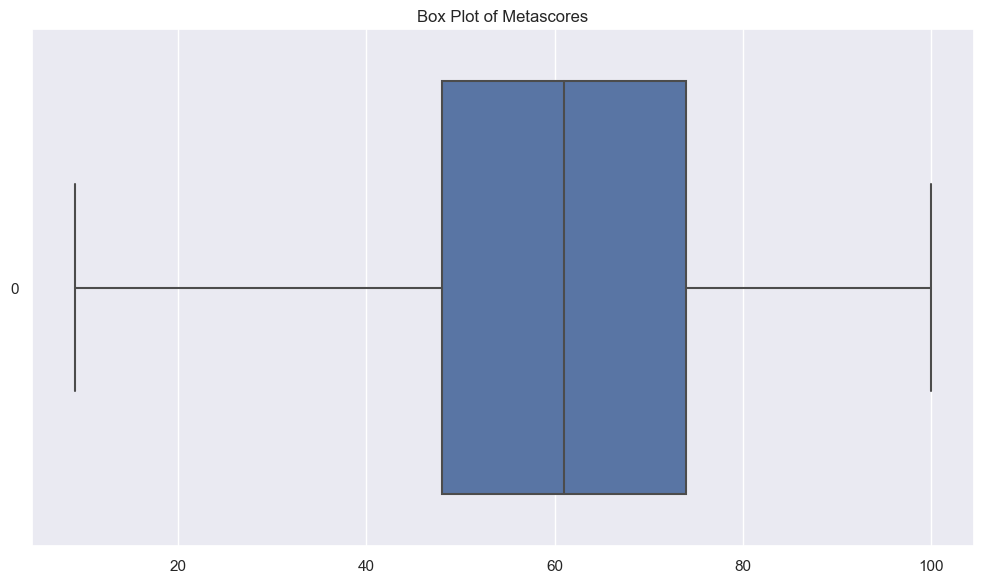

In [441]:
plt.figure(figsize=(10, 6))
sb.boxplot(df['Metascore'],orient='h')
plt.title('Box Plot of Metascores')
plt.tight_layout()
plt.show()

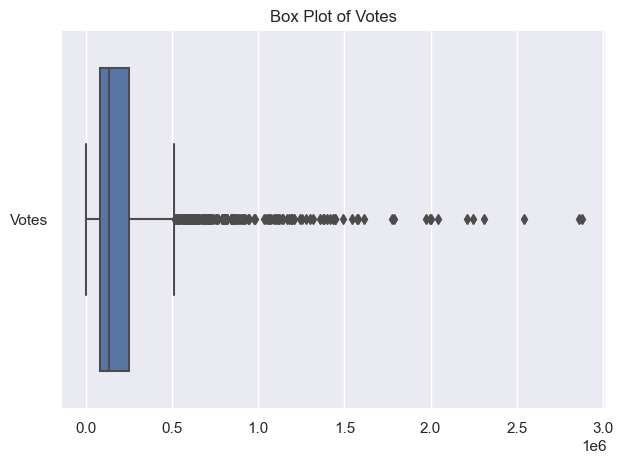

In [391]:
voteDF=pd.DataFrame(df['Votes'])
sb.boxplot(voteDF,orient='h')
plt.title('Box Plot of Votes')
plt.tight_layout()
plt.show()

In [392]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

# Drop outliers
outliers = find_outliers_IQR(datavoteDF)

In [393]:
outliers

,Votes
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
...,...
1995,NaN
1996,NaN
1997,NaN
1998,NaN


In [394]:
outliers=outliers.dropna(axis=0)
print("There are "+str(len(outliers))+" outliers in Votes")

There are 73 outliers in Votes


In [395]:
voteDF=datavoteDF.drop(outliers.index)

In [396]:
voteDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1752 entries, 2 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Votes   1752 non-null   float64
dtypes: float64(1)
memory usage: 27.4 KB


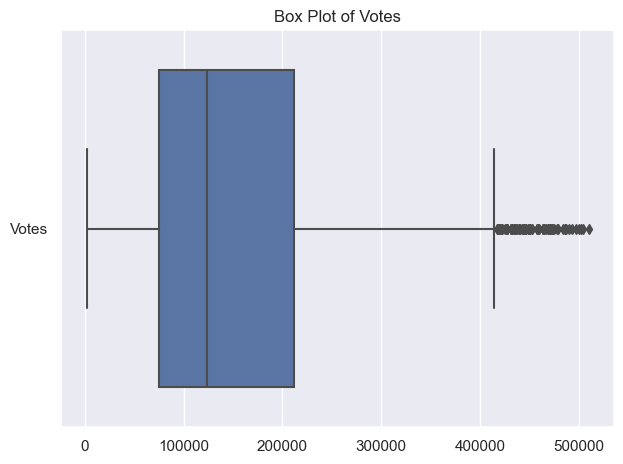

In [381]:
sb.boxplot(voteDF,orient='h')
plt.title('Box Plot of Votes')
plt.tight_layout()
plt.show()

In [382]:
RatingDF = pd.DataFrame(df['IMDB Rating'])
MetascoreDF = pd.DataFrame(df['Metascore'])

print("IMDB Rating DataFrame:")
print("Number of entries:", RatingDF.shape[0])
print("Mean IMDb Rating:", RatingDF.mean())
print("Median IMDb Rating:", RatingDF.median())
print("Standard Deviation of IMDb Rating:", RatingDF.std())

print("\nMetascore DataFrame:")
print("Number of entries:", MetascoreDF.shape[0])
print("Mean Metascore:", MetascoreDF.mean())
print("Median Metascore:", MetascoreDF.median())
print("Standard Deviation of Metascore:", MetascoreDF.std())

IMDB Rating DataFrame:
Number of entries: 2000
Mean IMDb Rating: IMDB Rating    6.9226
dtype: float64
Median IMDb Rating: IMDB Rating    7.0
dtype: float64
Standard Deviation of IMDb Rating: IMDB Rating    0.955618
dtype: float64

Metascore DataFrame:
Number of entries: 2000
Mean Metascore: Metascore    61.044294
dtype: float64
Median Metascore: Metascore    61.0
dtype: float64
Standard Deviation of Metascore: Metascore    17.937722
dtype: float64


# Visualisation of data using scatterplots

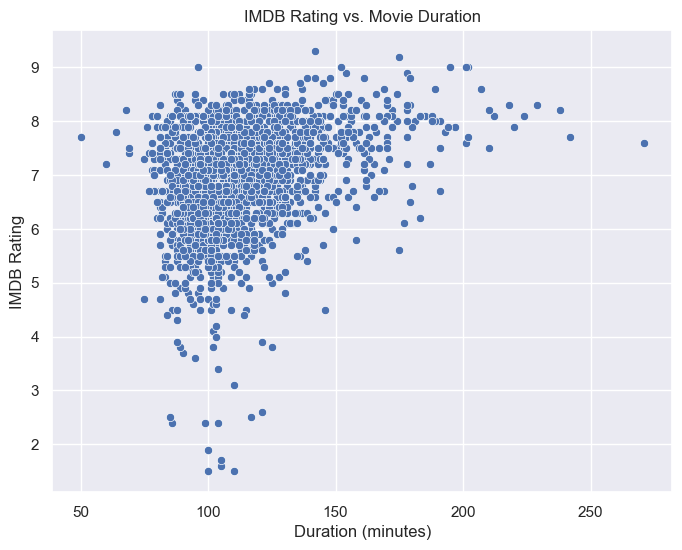

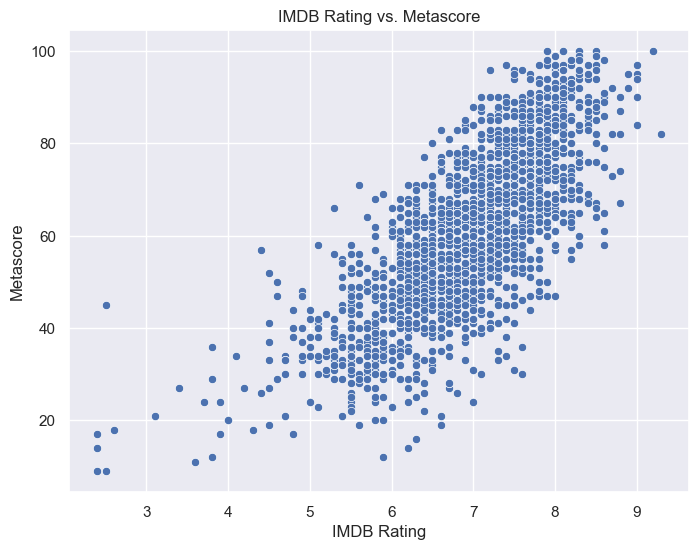

In [386]:
# Scatter Plot of IMDb Ratings vs. Movie Durations
plt.figure(figsize=(8, 6))
sb.scatterplot(x='Duration', y='IMDB Rating', data=df)
plt.title('IMDB Rating vs. Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDB Rating')
plt.show()

# Scatter Plot of IMDb Ratings vs. Metascores
plt.figure(figsize=(8, 6))
sb.scatterplot(x='IMDB Rating', y='Metascore', data=df)
plt.title('IMDB Rating vs. Metascore')
plt.xlabel('IMDB Rating')
plt.ylabel('Metascore')
plt.show()


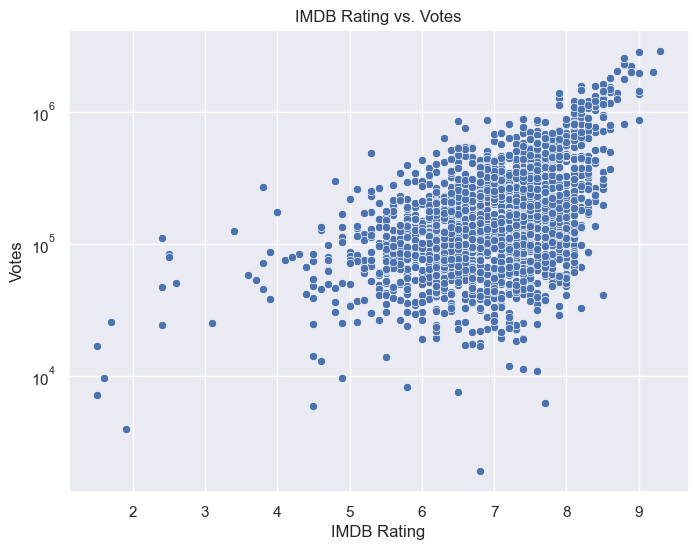

In [387]:
plt.figure(figsize=(8, 6))
sb.scatterplot(x='IMDB Rating', y='Votes', data=df)
plt.title('IMDB Rating vs. Votes')
plt.xlabel('IMDB Rating')
plt.ylabel('Votes')# Setting custom y-axis ticks
plt.yscale("log")
plt.show()

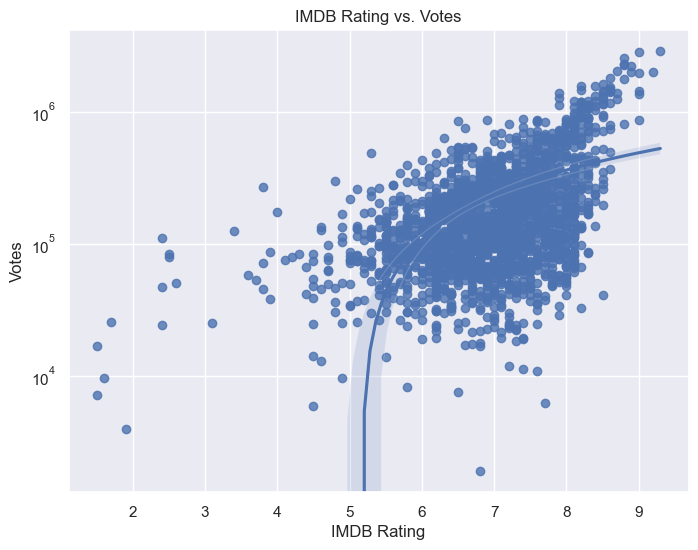

In [419]:
plt.figure(figsize=(8, 6))
sb.regplot(x='IMDB Rating', y='Votes', data=df)
plt.title('IMDB Rating vs. Votes')
plt.xlabel('IMDB Rating')
plt.ylabel('Votes')# Setting custom y-axis ticks
plt.yscale("log")
plt.show()

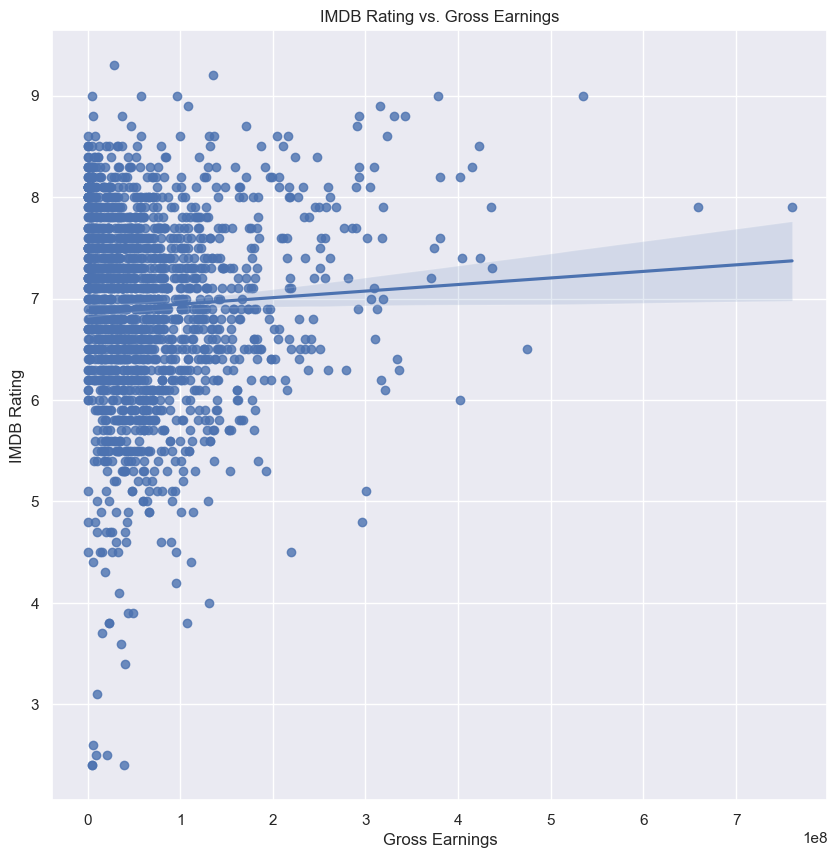

In [329]:
# Regression Plot of IMDb Ratings vs. Gross Earnings
plt.figure(figsize=(10,10))
sb.regplot(x='Gross', y='IMDB Rating', data=data.dropna(subset=['Gross']))
plt.title('IMDB Rating vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('IMDB Rating')
plt.show()

# Regression

## Multi-Variate Classificatoion tree

Intercept of Regression 	: b =  [4.56808783]
Coefficients of Regression 	: a =  [[0.03869037]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5818032915909597
Mean Squared Error (MSE) 	: 0.3571326392903124

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.527541296544987
Mean Squared Error (MSE) 	: 0.3530950828036163



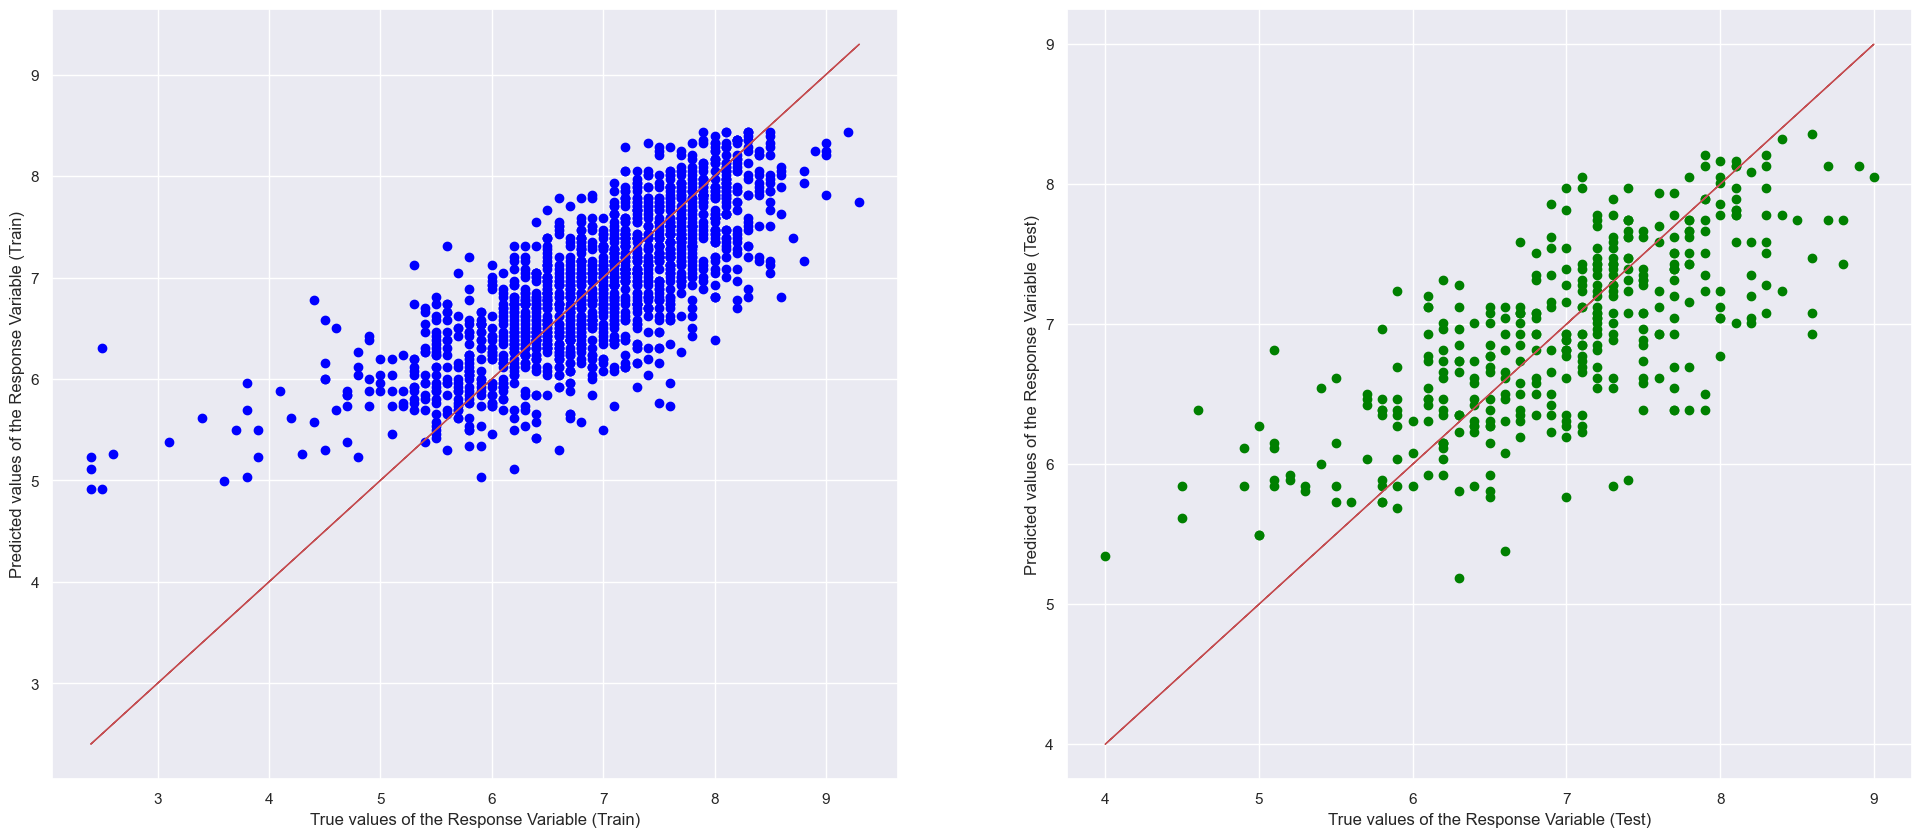

In [429]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

mergedDF = pd.DataFrame(df[['IMDB Rating', 'Metascore']])
mergedDF = mergedDF.dropna(axis=0)
imdb_ratingDF = pd.DataFrame(mergedDF['IMDB Rating'])
metascoreDF = pd.DataFrame(mergedDF['Metascore'])

X_train, X_test, y_train, y_test = train_test_split(metascoreDF, imdb_ratingDF, test_size = 0.2)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 10))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [389]:
mergedDF

,IMDB Rating,Metascore
0,9.2,100.0
1,9.0,90.0
2,7.7,86.0
3,8.3,100.0
4,7.4,73.0
...,...,...
1995,7.2,64.0
1996,5.0,36.0
1997,6.5,66.0
1998,6.4,63.0


Intercept of Regression 	: b =  [6.37825605]
Coefficients of Regression 	: a =  [[2.85659561e-06]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0791462006370508
Mean Squared Error (MSE) 	: 0.7788996326633866

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.09281010162163494
Mean Squared Error (MSE) 	: 0.7682422279502022



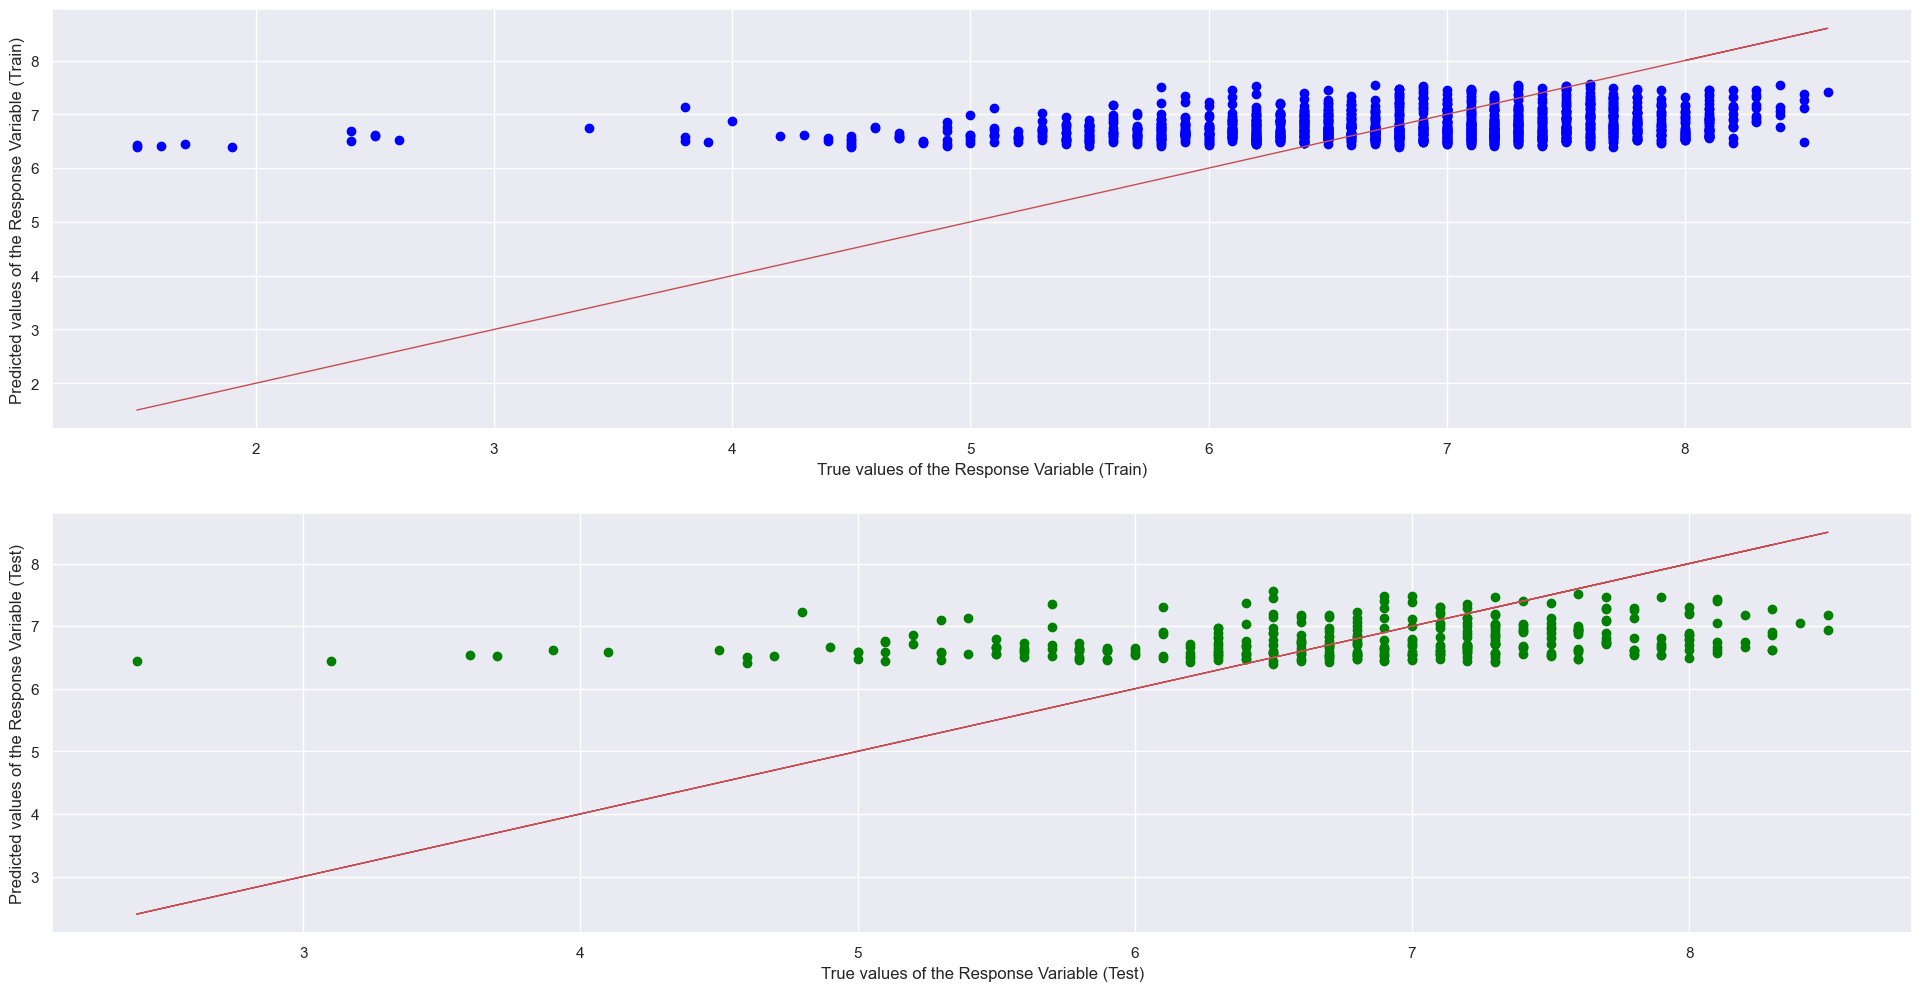

In [447]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


mergedDF = pd.concat((df['IMDB Rating'],voteDF), ignore_index=False, axis=1)
mergedDF = mergedDF.dropna(axis=0)
imdb_ratingDF = pd.DataFrame(mergedDF['IMDB Rating'])
votesDF = pd.DataFrame(mergedDF['Votes'])

X_train, X_test, y_train, y_test = train_test_split(votesDF, imdb_ratingDF, test_size = 0.2)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(2, 1, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  6.388756016391634
Coefficient of Regression 	: a =  [2.76449757e-06]

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.10384224765428252
Mean Squared Error (MSE) 	: 0.7606257579322255


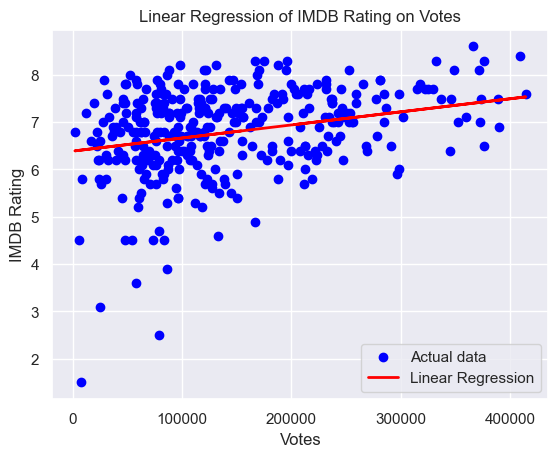

In [445]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


mergedDF = pd.concat((df['IMDB Rating'],voteDF), ignore_index=False, axis=1)
mergedDF = mergedDF.dropna(axis=0)
imdb_ratingDF = pd.DataFrame(mergedDF['IMDB Rating'])
votesDF = pd.DataFrame(mergedDF['Votes'])

# Splitting the data into features (votes) and target variable (IMDB ratings)
X = mergedDF[['Votes']]  # Features (votes)
y = mergedDF['IMDB Rating']  # Target variable (IMDB ratings)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating linear regression object
linreg = LinearRegression()

# Training the model using the training sets
linreg.fit(X_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficient of Regression \t: a = ', linreg.coef_)
print()

# Predicting the IMDB ratings for the test set
y_pred = linreg.predict(X_test)

# Checking the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred))

import matplotlib.pyplot as plt

# Plotting the scatter plot of test data
plt.scatter(X_test, y_test, color='blue', label='Actual data')

# Plotting the linear regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')

# Adding labels and title
plt.xlabel('Votes')
plt.ylabel('IMDB Rating')
plt.title('Linear Regression of IMDB Rating on Votes')
plt.legend()

# Displaying the plot
plt.show()


Intercept of Regression 	: b =  [6.35101933]
Coefficients of Regression 	: a =  [[2.98341716e-06]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.08574233735427816
Mean Squared Error (MSE) 	: 0.7848117925982196
Root Mean Squared Error (RMSE) 	: 0.8858960393851073

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.05962951204698019
Mean Squared Error (MSE) 	: 0.7457993379087376
Root Mean Squared Error (RMSE) 	: 0.8635967449618703



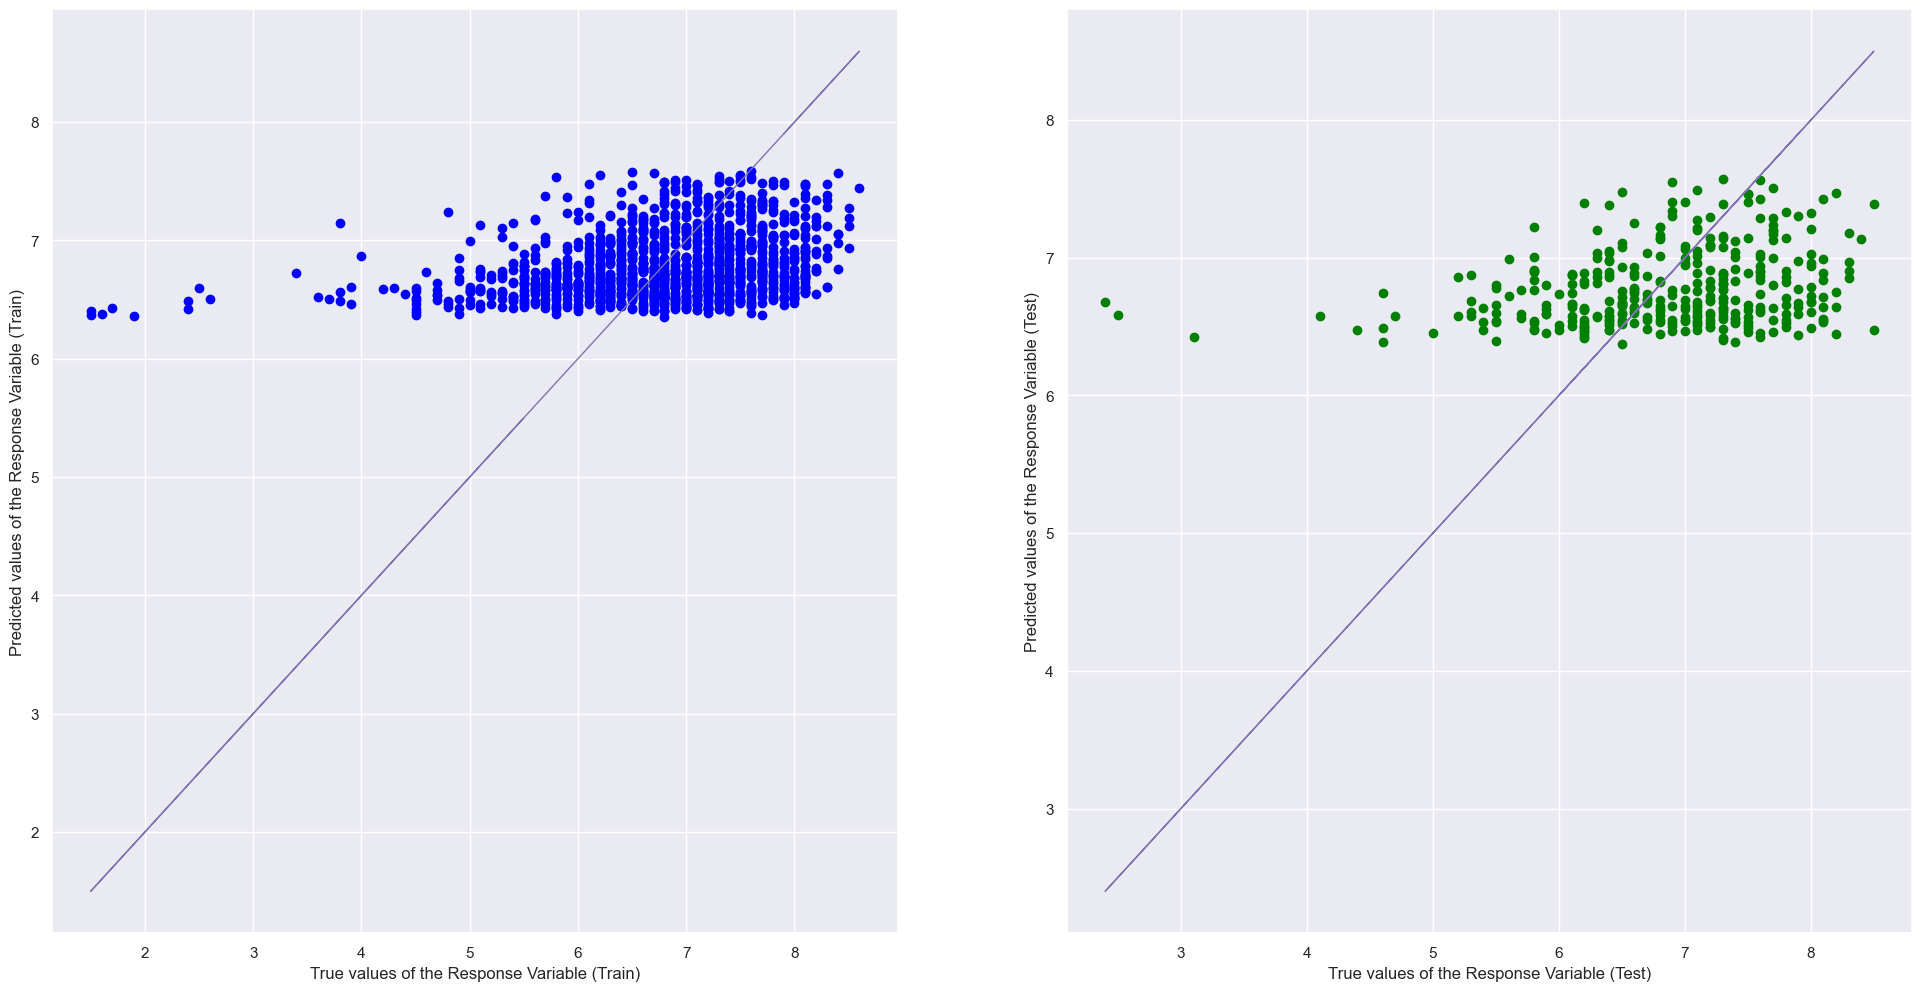

In [446]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the IMDb Rating - Votes Dataset
imdb_rating = pd.DataFrame(mergedDF['IMDB Rating'])   # Response
votes = pd.DataFrame(mergedDF['Votes'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(votes, imdb_rating, test_size=0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict IMDb Rating values corresponding to Votes
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color="blue")
axes[0].plot(y_train, y_train, 'm-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color="green")
axes[1].plot(y_test, y_test, 'm-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


In [418]:
mergedDF

,IMDB Rating,Votes
2,7.7,56476.0
3,8.3,313044.0
4,7.4,64331.0
5,7.6,216050.0
6,8.5,348110.0
...,...,...
1995,7.2,66235.0
1996,5.0,49527.0
1997,6.5,67318.0
1998,6.4,75956.0


Intercept of Regression 	: b =  [52628484.13677672]
Coefficients of Regression 	: a =  [[231543.89185294]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0031961986354422933
Mean Squared Error (MSE) 	: 5180524042401136.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0003390085324261882
Mean Squared Error (MSE) 	: 5914879650150114.0



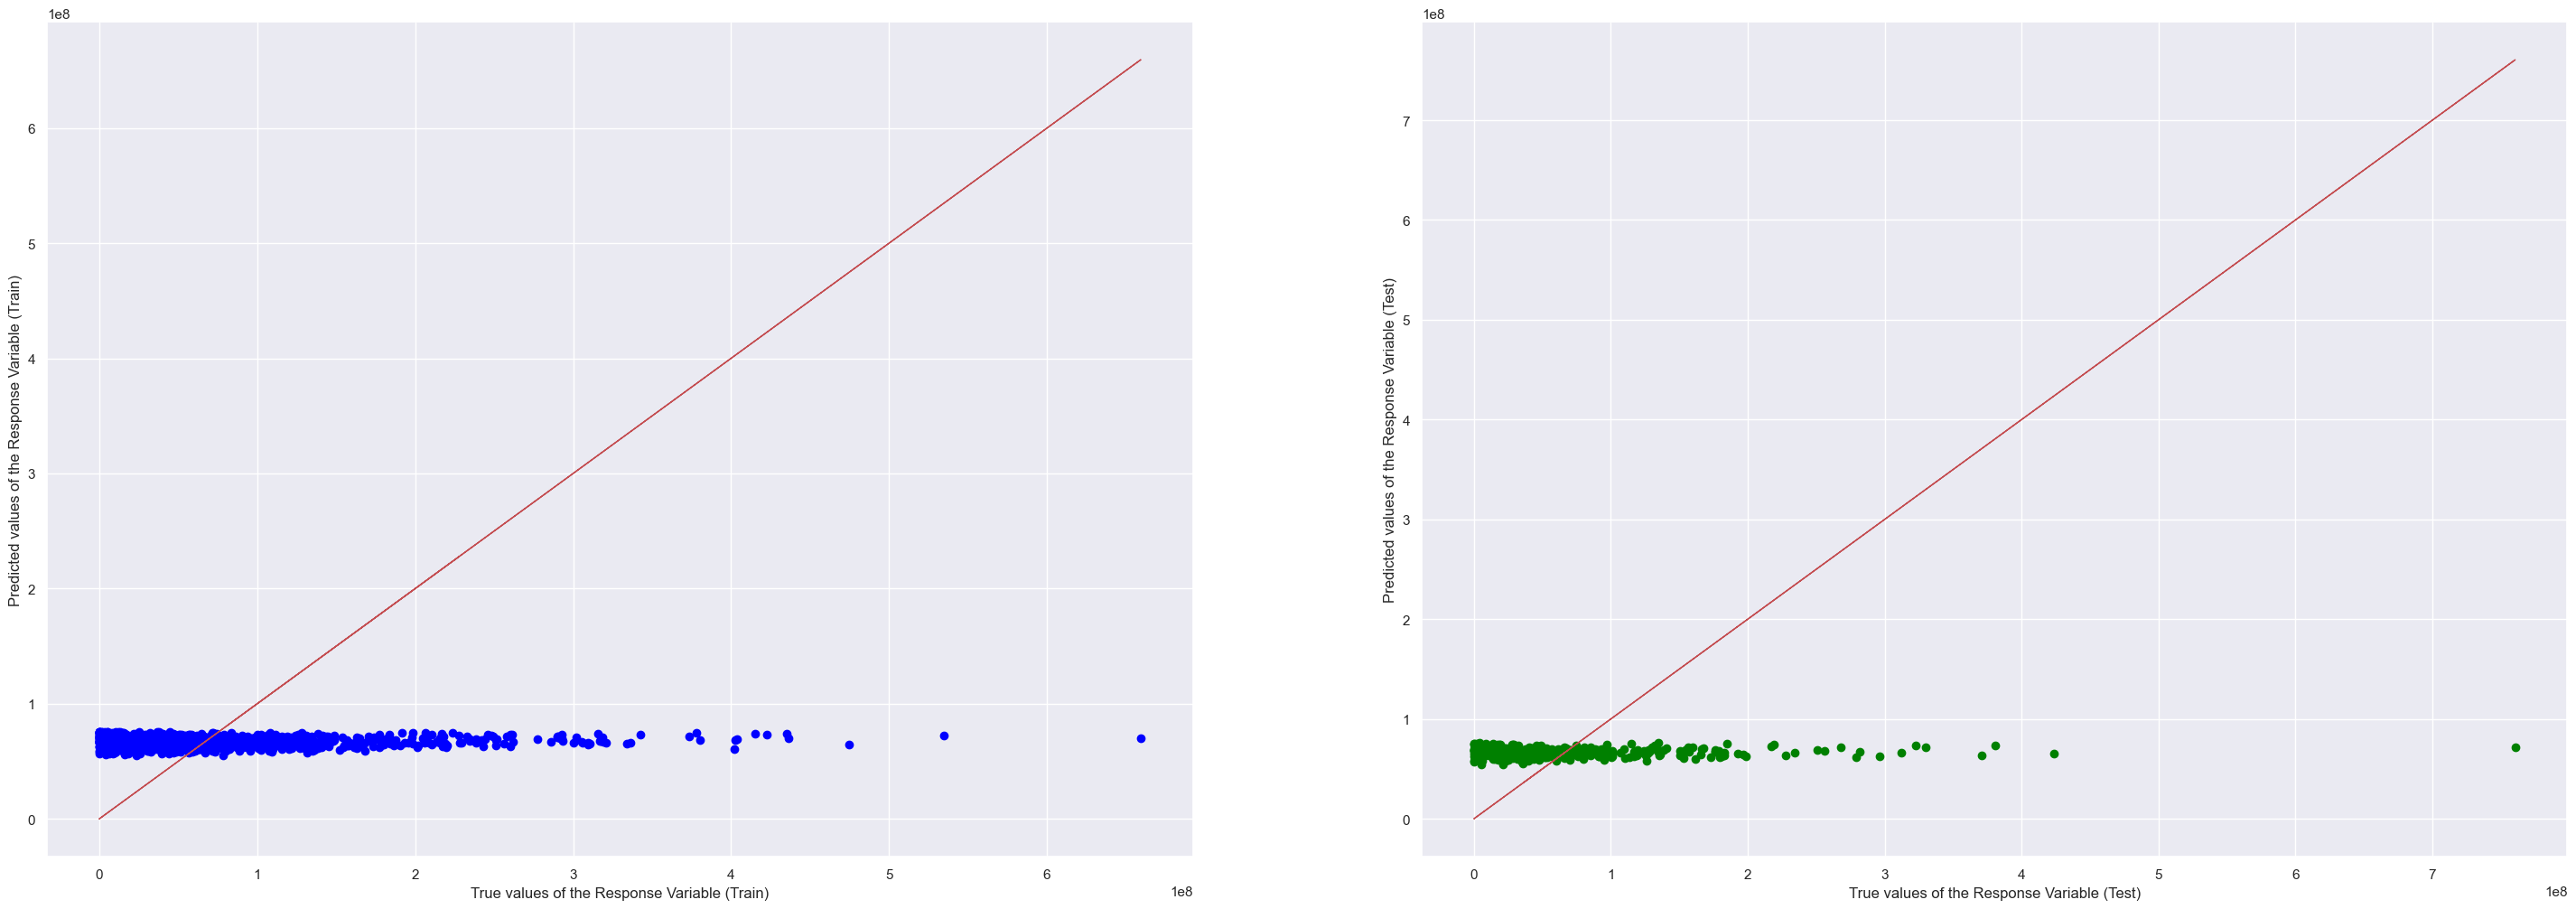

In [430]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

merged = pd.DataFrame(data[['Metascore', 'Gross']])
merged = merged.dropna(axis=0)
gross = pd.DataFrame(merged['Gross'])
metascore = pd.DataFrame(merged['Metascore'])

X_train, X_test, y_train, y_test = train_test_split(metascore, gross, test_size = 0.2)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(36, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()